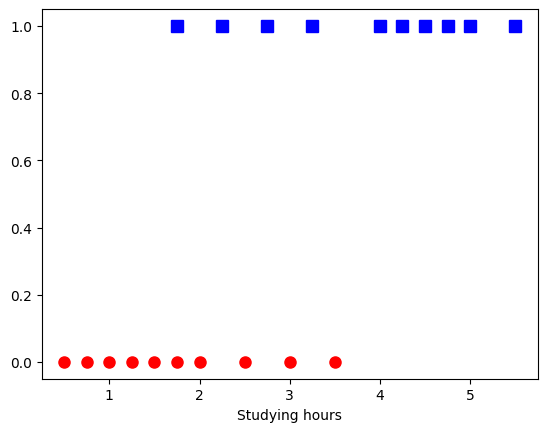

In [1]:
# Imports
from logr_utils import sigmoid, logistic_sigmoid_regression

from __future__ import division, print_function, unicode_literals

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the data
np.random.seed(2)

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])

y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# Intercept Term Inclusion
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

# Extract 'not pass' instances
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]

# Extract 'pass' instances
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

# Visualize the data
plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)
plt.xlabel('Studying hours')
plt.show()

In [2]:
# Define learning rate
eta = .05

# Initialize weights
d = X.shape[0]
w_init = np.random.randn(d, 1)

# Calculate the weights with Logistic Regression
w = logistic_sigmoid_regression(X, y, w_init, eta, 20)

# Print out weights
print(w[-1])

[[-4.092695  ]
 [ 1.55277242]]


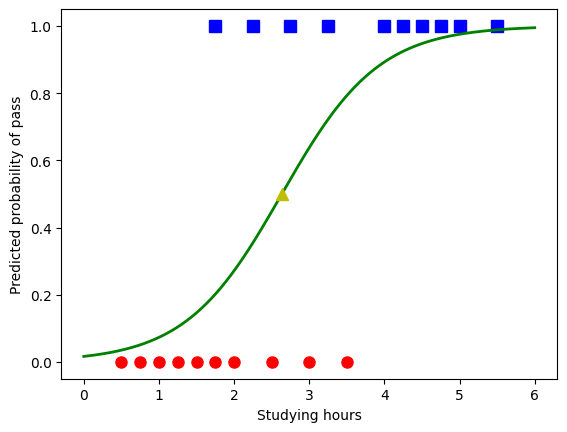

In [3]:
# Visualize the decision boundary generated by the model
plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)

plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('Studying hours')
plt.ylabel('Predicted probability of pass')
plt.show()

Predicted probabilities for new study hours:
Study hours: 2.45, Predicted pass probability: 0.4284
Study hours: 1.85, Predicted pass probability: 0.2279
Study hours: 3.75, Predicted pass probability: 0.8494
Study hours: 3.21, Predicted pass probability: 0.7092
Study hours: 4.05, Predicted pass probability: 0.8999


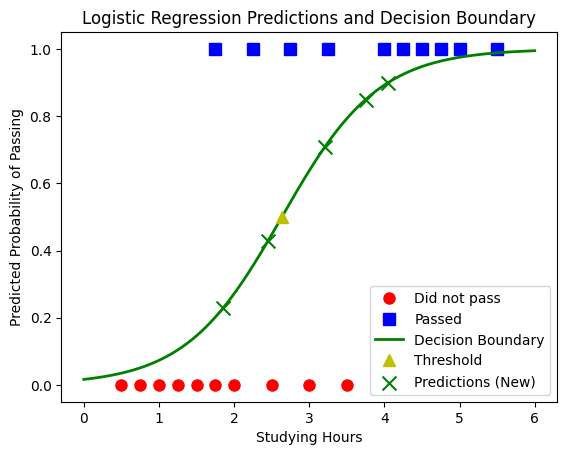

In [4]:
# New study hours for prediction
new_study_hours = np.array([2.45, 1.85, 3.75, 3.21, 4.05])

# Intercept Term Inclusion
X_new = np.concatenate((np.ones((1, new_study_hours.shape[0])), new_study_hours.reshape(1, -1)), axis=0)

# Inference from trained model
pred_prob_new = sigmoid(np.dot(w[-1].T, X_new))

# Print the predicted probabilities
print("Predicted probabilities for new study hours:")
for hour, prob in zip(new_study_hours, pred_prob_new[0]):
    print(f"Study hours: {hour:.2f}, Predicted pass probability: {prob:.4f}")

# Visualize new data along with the decision boundary
plt.plot(X0, y0, 'ro', markersize=8, label='Did not pass')
plt.plot(X1, y1, 'bs', markersize=8, label='Passed')

xx = np.linspace(0, 6, 1000)
yy = sigmoid(w0 + w1 * xx)
plt.plot(xx, yy, 'g-', linewidth=2, label='Decision Boundary')

plt.plot(threshold, 0.5, 'y^', markersize=8, label='Threshold')

plt.scatter(new_study_hours, pred_prob_new, color='green', marker='x', s=100, label='Predictions (New)')

plt.xlabel('Studying Hours')
plt.ylabel('Predicted Probability of Passing')
plt.legend()
plt.title('Logistic Regression Predictions and Decision Boundary')
plt.show()

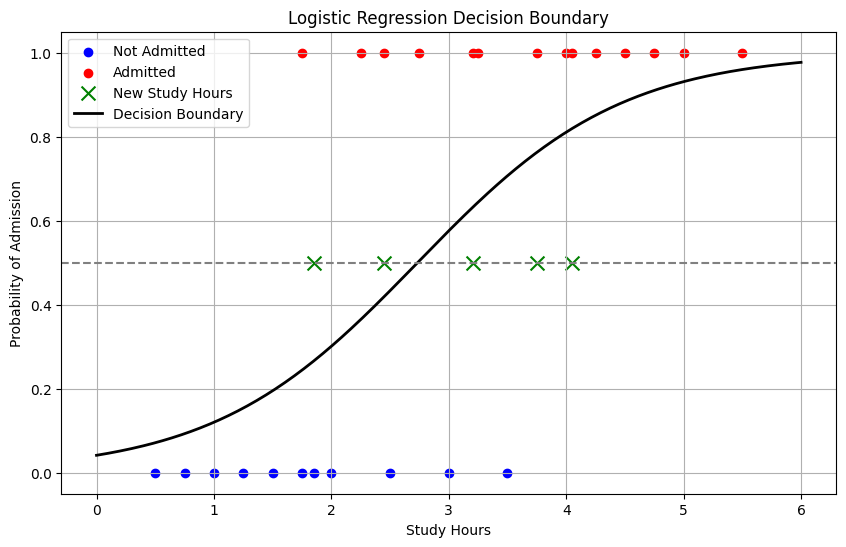

In [5]:
# Scikit-learn Logistic Regression implementation

# Prepare features and labels for training
X_train = X[1].reshape(-1, 1)
y_train = y

# Initialize and fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Function to plot the decision boundary
def plot_decision_boundary(model, X, y, title):
    x_range = np.linspace(0, 6, 300).reshape(-1, 1)
    y_proba = model.predict_proba(x_range)[:, 1]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0], y[y == 0], color='blue', label='Not Admitted')
    plt.scatter(X[y == 1], y[y == 1], color='red', label='Admitted')
    plt.scatter(new_study_hours, [0.5]*len(new_study_hours), color='green', marker='x', s=100, label='New Study Hours')
    plt.plot(x_range, y_proba, color='black', linewidth=2, label='Decision Boundary')
    plt.axhline(0.5, color='gray', linestyle='--')
    plt.title(title)
    plt.xlabel('Study Hours')
    plt.ylabel('Probability of Admission')
    plt.legend()
    plt.grid()
    plt.show()
    
new_X = np.concatenate((X_train, new_study_hours.reshape(-1, 1)), axis=0)
new_y = np.concatenate((y_train, np.array([1, 0, 1, 1, 1])))

# Plot decision boundary after adding new data
plot_decision_boundary(log_reg, new_X, new_y, title='Logistic Regression Decision Boundary')